<a href="https://colab.research.google.com/github/AadithS13/Content-Based-Image-Retrieval-System/blob/main/CBIR_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement

As digital media advances there is a lot we can learn and understand through the detailed analysis of images. The aim here through image processing is to analyse and extract useful information or display a particular image or collection of images according to what the user has searched in a dataset of images . This information can be stored, compared and displayed via different means to further interpret the images.

#Dataset Understanding

The dataset used here is a collection of images. There are total 4738 images . The images consist of lions,tigers,leopards,wolf and fox . The tigers can again be split into tiger and white tiger . Wolves can also be divided into wolf and artic wolf. Apart from that Lions can aslo be separated into lion and lioness.
The dataset also consist of infants of all these types of predators.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import csv
import pandas as pd
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
%matplotlib inline

In [ ]:
DATADIR = "/content/drive/MyDrive/Colab Notebooks/dataset/"

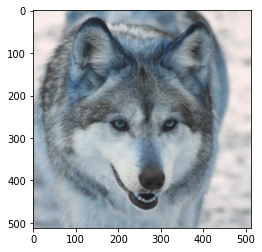

In [ ]:
path = DATADIR

for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img))
    plt.imshow(img_array)
    plt.show()
    break


In [ ]:
print(img_array[:,:,1])

[[232 232 232 ... 223 223 223]
 [232 232 232 ... 223 223 223]
 [232 232 232 ... 223 223 223]
 ...
 [184 182 178 ... 196 196 195]
 [185 183 180 ... 195 195 194]
 [186 183 181 ... 194 194 193]]


In [ ]:
just_now = img_array[:,:,1].mean()
just_now

151.50231552124023

In [ ]:
print(img_array)

[[[243 232 228]
  [243 232 228]
  [243 232 228]
  ...
  [235 223 221]
  [235 223 221]
  [235 223 221]]

 [[243 232 228]
  [243 232 228]
  [243 232 228]
  ...
  [235 223 221]
  [235 223 221]
  [235 223 221]]

 [[243 232 228]
  [243 232 228]
  [243 232 228]
  ...
  [235 223 221]
  [235 223 221]
  [235 223 221]]

 ...

 [[178 184 195]
  [176 182 193]
  [172 178 189]
  ...
  [197 196 198]
  [197 196 198]
  [196 195 197]]

 [[179 185 196]
  [177 183 194]
  [174 180 191]
  ...
  [196 195 197]
  [196 195 197]
  [195 194 196]]

 [[180 186 197]
  [177 183 194]
  [175 181 192]
  ...
  [195 194 196]
  [195 194 196]
  [194 193 195]]]


In [ ]:
IMG_SIZE = 100

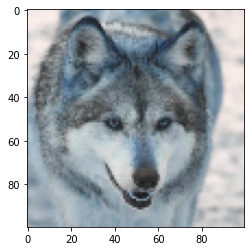

In [ ]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [ ]:

train_folder = DATADIR                  
train_annotation = DATADIR

files_in_train = sorted(os.listdir(train_folder)) 

images=[i for i in files_in_train]

df = pd.DataFrame()
df['images']=[train_folder+str(x) for x in images]       #creating feature called images(consist of image path) in excel
df['labels']=["Image"+str(x) for x in images]            #creating feature called label
df['fileType'] = ["jpg" for x in images]        
df['Gray Scale Features'] = [0 for x in images]          #creating feature called grayscale
df['Edge Features'] = [0 for x in images]                #creating feature called grayscale
df['Feature Matrix'] = [0 for x in images]               #creating feature called grayscale
df.to_csv('/content/drive/MyDrive/Colab Notebooks/ML_Group_Activity_Dataset.xlsx', header='Image')   

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ML_Group_Activity_Dataset.xlsx')

In [ ]:
df.head()

,Unnamed: 0,images,labels,fileType,Gray Scale Features,Edge Features,Feature Matrix
0,0,/content/drive/MyDrive/Colab Notebooks/dataset...,Image0.jpg,jpg,[196 194 191 ... 76 79 83],[0. 0. 0. ... 0. 0. 0.],[192.33333333 190.33333333 188. ... 7...
1,1,/content/drive/MyDrive/Colab Notebooks/dataset...,Image1.jpg,jpg,[37 38 38 ... 74 73 73],[0. 0. 0. ... 0. 0. 0.],0
2,2,/content/drive/MyDrive/Colab Notebooks/dataset...,Image10.jpg,jpg,[141 141 140 ... 115 113 111],[0. 0. 0. ... 0. 0. 0.],0
3,3,/content/drive/MyDrive/Colab Notebooks/dataset...,Image100.jpg,jpg,[147 147 147 ... 51 58 51],[0. 0. 0. ... 0. 0. 0.],0
4,4,/content/drive/MyDrive/Colab Notebooks/dataset...,Image1000.jpg,jpg,[213 212 210 ... 117 117 117],[0. 0. 0. ... 0. 0. 0.],0


In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df.shape

(4744, 6)

In [ ]:
df.describe()

,images,labels,fileType,Gray Scale Features,Edge Features,Feature Matrix
count,4744,4744,4744,4744,4744,4744
unique,4744,4744,1,4731,1,2
top,/content/drive/MyDrive/Colab Notebooks/dataset...,Image975.jpg,jpg,[0 0 0 ... 0 0 0],[0. 0. 0. ... 0. 0. 0.],0
freq,1,1,4744,3,4744,4743


(512, 512, 3)
786432
<built-in method format of str object at 0x7f2f0b9c6c70>


(512, 512, 3)
786432
<built-in method format of str object at 0x7f2f0b9c6c00>


(512, 512, 3)
786432
<built-in method format of str object at 0x7f2f0b9c68f0>


(512, 512, 3)
786432
<built-in method format of str object at 0x7f2f0b9c6a40>


(512, 512, 3)
786432
<built-in method format of str object at 0x7f2f0b9d5180>


(512, 512, 3)
786432
<built-in method format of str object at 0x7f2f0b9d5110>


(512, 512, 3)
786432
<built-in method format of str object at 0x7f2f0b9d50a0>


(512, 512, 3)
786432
<built-in method format of str object at 0x7f2f0b9d5030>


(512, 512, 3)
786432
<built-in method format of str object at 0x7f2f0b9d5260>


(512, 512, 3)
786432
<built-in method format of str object at 0x7f2f0b9d52d0>




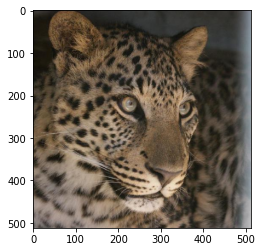

In [ ]:

for img in df['images'].head(10):
  img_array = cv2.imread(img)
  im2 = img_array.copy()
  im2[:, :, 0] = img_array[:, :, 2]         #Converting BGR to RGB
  im2[:, :, 2] = img_array[:, :, 0]
  plt.imshow(im2)
  print(im2.shape)
  print(im2.size)
  print(img.format)
  print("\n")


    
        

In [ ]:
for img in df['images'].tail():
  print(img)

/content/drive/MyDrive/Colab Notebooks/dataset/995.jpg
/content/drive/MyDrive/Colab Notebooks/dataset/996.jpg
/content/drive/MyDrive/Colab Notebooks/dataset/997.jpg
/content/drive/MyDrive/Colab Notebooks/dataset/998.jpg
/content/drive/MyDrive/Colab Notebooks/dataset/999.jpg


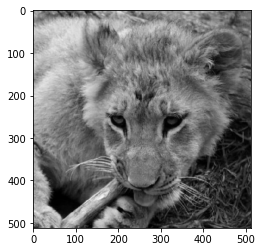

In [ ]:
image1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/dataset/995.jpg')
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
im2 = gray_image1.copy()
plt.imshow(im2,cmap="gray")

In [ ]:
print(gray_image1)

[[147 144 141 ... 119 120 122]
 [143 141 140 ... 118 120 123]
 [138 138 139 ... 115 119 122]
 ...
 [115  95  63 ...  32  24  29]
 [106  85  50 ...  20  13  25]
 [100  93  66 ...  10   7  24]]


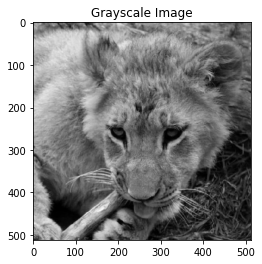

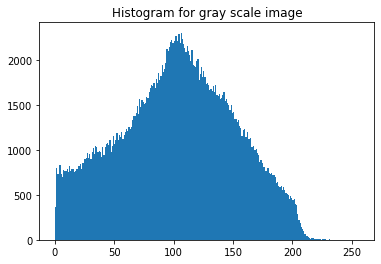

In [ ]:

path = r'/content/drive/MyDrive/Colab Notebooks/dataset/995.jpg'
image1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/dataset/995.jpg')
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
im2 = gray_image1.copy()
plt.imshow(im2,cmap="gray")
plt.title("Grayscale Image")
plt.show()
print('\n')

dst = cv2.calcHist(im2, [0], None, [256], [0,256])
plt.hist(im2.ravel(),256,[0,256])
plt.title('Histogram for gray scale image')
plt.show()

In [ ]:
im2.shape,im2

((512, 512), array([[147, 144, 141, ..., 119, 120, 122],
        [143, 141, 140, ..., 118, 120, 123],
        [138, 138, 139, ..., 115, 119, 122],
        ...,
        [115,  95,  63, ...,  32,  24,  29],
        [106,  85,  50, ...,  20,  13,  25],
        [100,  93,  66, ...,  10,   7,  24]], dtype=uint8))

In [ ]:
features = np.reshape(im2, (512*512))

features.shape, features

((262144,), array([147, 144, 141, ...,  10,   7,  24], dtype=uint8))

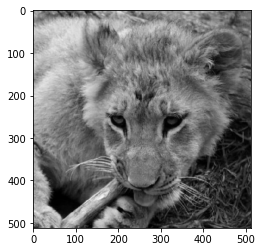

(262144,)
[147 144 141 ...  10   7  24]


In [ ]:
plt.imshow(im2,cmap='gray')
plt.show()
print(features.shape)
print(features)

In [ ]:
count = 1

for img in df['images']:

  img_array = cv2.imread(img)
  gray_image = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
  gray_image = cv2.cvtColor(gray_image, cv2.COLOR_RGB2GRAY)
  im2 = gray_image.copy()
  features = np.reshape(im2, (512*512))
     
  f = open('/content/drive/MyDrive/Colab Notebooks/ML_Group_Activity_Dataset.xlsx', 'r')   #opening csv file and reading it
  reader = csv.reader(f)
  mylist = list(reader)
  f.close()
  mylist[count][4] = features
  my_new_list = open('/content/drive/MyDrive/Colab Notebooks/ML_Group_Activity_Dataset.xlsx', 'w', newline = '')
  csv_writer = csv.writer(my_new_list)
  csv_writer.writerows(mylist)
  my_new_list.close()
      
  count = count + 1
break
    

In [ ]:
image = imread(r'/content/drive/MyDrive/Colab Notebooks/dataset/995.jpg')
feature_matrix = np.zeros((512,512)) 
feature_matrix.shape

(512, 512)

In [ ]:
for i in range(0,image.shape[0]):
    for j in range(0,image.shape[1]):
        feature_matrix[i][j] = ((int(image[i,j,0]) + int(image[i,j,1]) + int(image[i,j,2]))/3)
print(feature_matrix[i][j])
print(i)
print(j)

In [ ]:
def feature_matrix_calc(image):
  feature_matrix = np.zeros((512,512))
  for i in range(0,image.shape[0]):
    for j in range(0,image.shape[1]):
        feature_matrix[i][j] = ((int(image[i,j,0]) + int(image[i,j,1]) + int(image[i,j,2]))/3)
        features = np.reshape(feature_matrix, (512*512)) 
  return features

In [ ]:
features = np.reshape(feature_matrix, (512*512)) 
features.shape,features

((262144,), array([138.33333333, 135.        , 132.        , ...,   9.33333333,
          6.66666667,  22.66666667]))

In [ ]:
count = 1
for img in df['images']:
  img_array = cv2.imread(img)
  gray_image = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
  gray_image = cv2.cvtColor(gray_image, cv2.COLOR_RGB2GRAY)
  im2 = gray_image.copy()

  edges_prewitt_horizontal = prewitt_h(im2)   #calculating horizontal edges using prewitt kernel
 
  edges_prewitt_vertical = prewitt_v(im2)     #calculating vertical edges using prewitt kernel
  e_p_v = np.reshape(edges_prewitt_vertical,(512*512))
  f = open('/content/drive/MyDrive/Colab Notebooks/ML_Group_Activity_Dataset.xlsx', 'r')  
  reader = csv.reader(f)
  mylist = list(reader)
  f.close()
  mylist[count][5] = e_p_v
  my_new_list = open('/content/drive/MyDrive/Colab Notebooks/ML_Group_Activity_Dataset.xlsx', 'w', newline = '')
  csv_writer = csv.writer(my_new_list)
  csv_writer.writerows(mylist)
  my_new_list.close()
  count = count + 1
break  

In [ ]:
e_p_v = np.reshape(edges_prewitt_vertical,(512*512))
print(e_p_v.shape)
print(e_p_v)

(262144,)
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
count = 1
for img in df['images'].head(3):
  img_array = cv2.imread(img)
  gray_image = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
  im2 = gray_image.copy()
  feature_matrix = np.zeros((512,512)) 
  for i in range(0,im2.shape[0]):
    for j in range(0,im2.shape[1]):
          feature_matrix[i][j] = ((int(im2[i,j,0]) + int(im2[i,j,1]) + int(im2[i,j,2]))/3)
  features = np.reshape(feature_matrix, (512*512)) 
  f = open('/content/drive/MyDrive/Colab Notebooks/ML_Group_Activity_Dataset.xlsx', 'r')
  reader = csv.reader(f)
  mylist = list(reader)
  f.close()
  mylist[count][6] = features
  my_new_list = open('/content/drive/MyDrive/Colab Notebooks/ML_Group_Activity_Dataset.xlsx', 'w', newline = '')
  csv_writer = csv.writer(my_new_list)
  csv_writer.writerows(mylist)
  my_new_list.close()
  count = count + 1
break  
print("Done")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import os

In [ ]:
def image_to_feature_vector(image, size=(32, 32)):

	return cv2.resize(image, size).flatten()

In [ ]:
def extract_color_histogram(image, bins=(8, 8, 8)):

	hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
	hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,
		[0, 180, 0, 256, 0, 256])

	if imutils.is_cv2():
		hist = cv2.normalize(hist)
	
	else:
		cv2.normalize(hist, hist)
	
	return hist.flatten()

In [ ]:
def extract_feature_red_by_color(img):
  mean_red = img[:,:,0].mean()
  return mean_red

def extract_feature_blue_by_color(img):
  mean_blue = img[:,:,1].mean()
  return mean_blue

def extract_feature_green_by_color(img):
  mean_green = img[:,:,2].mean()
  return mean_green


In [ ]:
rawImages = []
features = []
feature_matrix_comparison = []
feature_red_by_color = []
feature_blue_by_color = []
feature_green_by_color = []

In [ ]:
img_array = cv2.imread(img)
gray_image = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
im2 = gray_image.copy()
feature1 = feature_matrix_calc(im2)
print(feature1)


[100.33333333 100.33333333  99.33333333 ... 131.         124.
 117.        ]


In [ ]:
for img in df['images'].head(100):
  img_array = cv2.imread(img)
  gray_image = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
  im2 = gray_image.copy()
  feature1 = feature_matrix_calc(im2)
  feature_matrix_comparison.append(feature1)
print(feature_matrix_comparison)

[array([192.33333333, 190.33333333, 188.        , ...,  70.33333333,
        73.33333333,  77.33333333]), array([32.33333333, 33.33333333, 33.33333333, ..., 53.33333333,
       52.        , 52.        ]), array([112.33333333, 112.33333333, 111.66666667, ...,  97.        ,
        94.33333333,  91.33333333]), array([137.33333333, 137.33333333, 137.33333333, ...,  50.66666667,
        58.        ,  51.        ]), array([218.        , 217.        , 215.        , ..., 113.33333333,
       113.        , 113.        ]), array([147., 147., 147., ..., 116.,  97.,  59.]), array([124.        , 129.        , 132.        , ..., 196.66666667,
       193.33333333, 191.33333333]), array([55.        , 49.        , 42.33333333, ..., 58.66666667,
       37.33333333, 14.33333333]), array([94.66666667, 92.66666667, 90.66666667, ..., 62.66666667,
       60.66666667, 58.66666667]), array([ 61.33333333,  61.33333333,  61.33333333, ..., 188.66666667,
       188.66666667, 188.66666667]), array([ 60.33333333,  

In [ ]:
for img in df['images'].head(100):
  img_array = cv2.imread(img)
  gray_image = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
  im2 = gray_image.copy()
  pixels = image_to_feature_vector(im2)
  rawImages.append(pixels)
print(rawImages)

[array([191, 184, 161, ...,  92,  76,  50], dtype=uint8), array([29, 51, 31, ..., 81, 95,  4], dtype=uint8), array([130, 159,  43, ..., 196, 184,  79], dtype=uint8), array([140, 153, 110, ...,  69,  57,  48], dtype=uint8), array([196, 212, 237, ..., 132, 100,  79], dtype=uint8), array([173, 146, 128, ...,  57,  51,  48], dtype=uint8), array([ 66,  74,  62, ..., 212, 202, 174], dtype=uint8), array([34, 37, 33, ..., 34, 17, 23], dtype=uint8), array([ 88, 107,  69, ...,  72,  64,  67], dtype=uint8), array([ 53,  50,  44, ..., 176, 176, 178], dtype=uint8), array([144, 189,  36, ..., 175, 174, 170], dtype=uint8), array([127, 151, 122, ..., 157, 134,  89], dtype=uint8), array([59, 50, 44, ..., 26, 27, 32], dtype=uint8), array([206, 184, 157, ..., 168, 137,  82], dtype=uint8), array([166, 191, 151, ..., 120,  91,  59], dtype=uint8), array([195, 172, 162, ...,  81,  55,  48], dtype=uint8), array([197, 169, 122, ..., 228, 184, 141], dtype=uint8), array([240, 192, 118, ..., 209, 172, 109], dtype

In [ ]:
for img in df['images'].head(100):
  img_array = cv2.imread(img)
  gray_image = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
  im2 = gray_image.copy()
  mean_red  =  extract_feature_red_by_color(im2)
  mean_blue  =  extract_feature_blue_by_color(im2)
  mean_green  =  extract_feature_green_by_color(im2)
  feature_red_by_color.append(mean_red)
  feature_blue_by_color.append(mean_blue)
  feature_green_by_color.append(mean_green)
print(feature_green_by_color)

[105.73980331420898, 80.88410568237305, 73.14616775512695, 105.68922805786133, 127.63744354248047, 103.4682731628418, 119.69670104980469, 97.92173767089844, 86.96648025512695, 69.47468948364258, 83.69847869873047, 77.52945709228516, 96.92412948608398, 102.26235580444336, 98.31709671020508, 104.66012191772461, 82.54154968261719, 91.88594055175781, 102.08971405029297, 110.70338821411133, 141.7988166809082, 117.5192985534668, 117.39718246459961, 99.8713607788086, 122.18805694580078, 81.88659286499023, 104.91067504882812, 101.18404769897461, 72.25720977783203, 124.84542846679688, 96.18998336791992, 143.8000946044922, 141.95819854736328, 123.75634002685547, 107.88349151611328, 110.28078079223633, 117.80609512329102, 83.84781265258789, 128.24318313598633, 108.78003311157227, 88.51593017578125, 120.70943832397461, 54.42991256713867, 114.08758926391602, 73.11336517333984, 94.14338302612305, 82.97819519042969, 91.16617584228516, 124.93206787109375, 142.8924789428711, 92.38995742797852, 97.22507

In [ ]:
sobel_feature = []

In [ ]:
for img in df['images'].head(100):
  img_array = cv2.imread(img)
  gray_image = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
  for_sobel = cv2.cvtColor(img_array,cv2.COLOR_RGB2GRAY)
  for_sobel = np.array(gray_image.copy())
  sobel_image1 = get_Sobel(for_sobel)
  sobel_feature.append(sobel_image)
print(sobel)

In [ ]:
for img in df['images'].head(100):
  img_array = cv2.imread(img)
  gray_image = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
  im2 = gray_image.copy()
  hist = extract_color_histogram(im2)
  features.append(hist)
print(hist)

[6.59142897e-05 7.25057209e-04 5.10835729e-04 1.00519287e-03
 2.07630009e-03 1.95765439e-02 9.63996444e-03 2.30205655e-02
 1.64785724e-05 4.11964313e-04 3.95485724e-04 4.44921461e-04
 8.89842922e-04 3.46050016e-04 2.30700010e-04 0.00000000e+00
 6.59142897e-05 3.29571456e-04 1.13702146e-03 1.64785728e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.97742862e-04 2.80135719e-04 9.88714310e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.88714310e-05 6.59142897e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.483071

In [ ]:
rawImages = np.array(rawImages)
features = np.array(features)
print("[INFO] pixels matrix: {:.2f}MB".format(
	rawImages.nbytes / (1024 * 1000.0)))
print("[INFO] features matrix: {:.2f}MB".format(
	features.nbytes / (1024 * 1000.0)))

[INFO] pixels matrix: 0.30MB
[INFO] features matrix: 0.20MB


In [ ]:
def euclidean_dist(A, B):
    return np.sum( (A - B)**2 ) ** 0.5

In [ ]:
input_image_path = '/content/drive/MyDrive/Colab Notebooks/dataset/1.jpg'
img_array = cv2.imread(input_image_path)
gray_image = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
im2 = gray_image.copy()
input_image_pixels = image_to_feature_vector(im2)
input_image_hist = extract_color_histogram(im2)
input_image_feature_mat = feature_matrix_calc(im2)
input_image_red_by_color = extract_feature_red_by_color(im2)
input_image_blue_by_color = extract_feature_blue_by_color(im2)
input_image_green_by_color = extract_feature_green_by_color(im2)
for_sobel = cv2.cvtColor(im2,cv2.COLOR_BGR2GRAY)
input_image_sobel = get_Sobel(for_sobel)
input_image_sobel

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
euclidian_col = []
euclidian_col1 = []
euclidian_col2 = []

In [ ]:
euclidian_col3 = []

In [ ]:
for i in range(0,100):
  for j in range(0,3072):
    euc_sum = 0
    now = input_image_pixels[j]
    euclidean = euclidean_dist(rawImages[i][j],now)
    euc_sum = euc_sum+euclidean
  euclidian_col.append(euc_sum)
euclidian_col

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in ubyte_scalars
  


[46.0,
 0.0,
 75.0,
 44.0,
 75.0,
 44.0,
 170.0,
 19.0,
 63.0,
 174.0,
 166.0,
 85.0,
 28.0,
 78.0,
 55.0,
 44.0,
 137.0,
 105.0,
 63.0,
 16.0,
 92.0,
 223.0,
 193.0,
 112.0,
 65.0,
 38.0,
 20.0,
 13.0,
 29.0,
 105.0,
 63.0,
 56.0,
 141.0,
 188.0,
 18.0,
 80.0,
 78.0,
 18.0,
 86.0,
 106.0,
 160.0,
 101.0,
 16.0,
 58.0,
 13.0,
 23.0,
 54.0,
 102.0,
 32.0,
 43.0,
 31.0,
 135.0,
 11.0,
 12.0,
 108.0,
 67.0,
 102.0,
 101.0,
 20.0,
 29.0,
 254.0,
 45.0,
 45.0,
 87.0,
 14.0,
 183.0,
 85.0,
 95.0,
 11.0,
 110.0,
 63.0,
 38.0,
 57.0,
 55.0,
 95.0,
 86.0,
 175.0,
 217.0,
 81.0,
 107.0,
 69.0,
 171.0,
 3.0,
 44.0,
 65.0,
 139.0,
 75.0,
 251.0,
 51.0,
 78.0,
 31.0,
 144.0,
 1.0,
 38.0,
 71.0,
 52.0,
 130.0,
 28.0,
 89.0,
 89.0]

In [ ]:
euclidian_col

[]

In [ ]:
new_euclidian_col = euclidian_col.sort
print(new_euclidian_col)

<built-in method sort of list object at 0x7f8df656a820>


In [ ]:
min(euclidian_col)

0.0

In [ ]:
for i in range(0,100):
  for j in range(0,512):
    euc_sum = 0
    now = input_image_pixels[j]
    euclidean = euclidean_dist(rawImages[i][j],now)
    euc_sum = euc_sum+euclidean
  euclidian_col1.append(euc_sum)
euclidian_col1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in ubyte_scalars
  


[241.0,
 0.0,
 79.0,
 76.0,
 127.0,
 243.0,
 102.0,
 89.0,
 58.0,
 237.0,
 56.0,
 90.0,
 126.0,
 235.0,
 137.0,
 100.0,
 217.0,
 94.0,
 235.0,
 106.0,
 50.0,
 66.0,
 110.0,
 116.0,
 55.0,
 142.0,
 55.0,
 27.0,
 44.0,
 42.0,
 44.0,
 69.0,
 90.0,
 37.0,
 78.0,
 22.0,
 242.0,
 25.0,
 157.0,
 158.0,
 34.0,
 255.0,
 64.0,
 67.0,
 4.0,
 55.0,
 28.0,
 68.0,
 73.0,
 158.0,
 4.0,
 71.0,
 141.0,
 242.0,
 119.0,
 9.0,
 81.0,
 60.0,
 153.0,
 47.0,
 88.0,
 79.0,
 78.0,
 15.0,
 14.0,
 111.0,
 88.0,
 4.0,
 233.0,
 89.0,
 67.0,
 97.0,
 110.0,
 110.0,
 78.0,
 15.0,
 75.0,
 43.0,
 1.0,
 221.0,
 63.0,
 253.0,
 15.0,
 98.0,
 182.0,
 121.0,
 55.0,
 122.0,
 69.0,
 68.0,
 1.0,
 249.0,
 43.0,
 98.0,
 77.0,
 160.0,
 94.0,
 6.0,
 77.0,
 83.0]

In [ ]:
k=5

In [ ]:

# value of k
k = 5
int_euc = np.array(int_euclidian_col)  
# using np.argpartition()
result = np.argpartition(int_euc, k)
  
# k smallest number of array
print(k, "smallest elements of the array")
print(int_euc[result[:k]])

5 smallest elements of the array
[ 1  0  3 11 11]


In [ ]:
index_value =int_euclidian_col2.index(3)
index_value

25

In [ ]:
index_value_path = df['images'].iloc[index_value]
index_value_path

'/content/drive/MyDrive/Colab Notebooks/dataset/102.jpg'

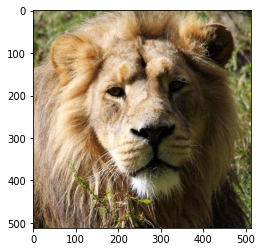

In [ ]:
input_image_path = index_value_path
img_array = cv2.imread(input_image_path)
gray_image = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

plt.imshow(gray_image)

In [ ]:
int_euclidian_col = ([int(euclidian_col) for euclidian_col in euclidian_col])
print(int_euclidian_col)

[46, 0, 75, 44, 75, 44, 170, 19, 63, 174, 166, 85, 28, 78, 55, 44, 137, 105, 63, 16, 92, 223, 193, 112, 65, 38, 20, 13, 29, 105, 63, 56, 141, 188, 18, 80, 78, 18, 86, 106, 160, 101, 16, 58, 13, 23, 54, 102, 32, 43, 31, 135, 11, 12, 108, 67, 102, 101, 20, 29, 254, 45, 45, 87, 14, 183, 85, 95, 11, 110, 63, 38, 57, 55, 95, 86, 175, 217, 81, 107, 69, 171, 3, 44, 65, 139, 75, 251, 51, 78, 31, 144, 1, 38, 71, 52, 130, 28, 89, 89]


In [ ]:
int_euclidian_col1 = ([int(euclidian_col1) for euclidian_col1 in euclidian_col1])
print(int_euclidian_col1)

[241, 0, 79, 76, 127, 243, 102, 89, 58, 237, 56, 90, 126, 235, 137, 100, 217, 94, 235, 106, 50, 66, 110, 116, 55, 142, 55, 27, 44, 42, 44, 69, 90, 37, 78, 22, 242, 25, 157, 158, 34, 255, 64, 67, 4, 55, 28, 68, 73, 158, 4, 71, 141, 242, 119, 9, 81, 60, 153, 47, 88, 79, 78, 15, 14, 111, 88, 4, 233, 89, 67, 97, 110, 110, 78, 15, 75, 43, 1, 221, 63, 253, 15, 98, 182, 121, 55, 122, 69, 68, 1, 249, 43, 98, 77, 160, 94, 6, 77, 83]


In [ ]:
int_euclidian_col2 = ([int(euclidian_col2) for euclidian_col2 in euclidian_col2])
print(int_euclidian_col2)

[130, 0, 88, 115, 175, 98, 56, 57, 85, 121, 4, 69, 18, 64, 43, 133, 127, 7, 150, 15, 96, 147, 13, 161, 103, 3, 135, 30, 194, 108, 141, 115, 92, 21, 1, 98, 54, 69, 19, 11, 96, 99, 96, 38, 45, 10, 78, 8, 205, 218, 177, 158, 204, 31, 114, 13, 83, 53, 28, 132, 45, 148, 55, 74, 48, 114, 53, 52, 2, 41, 76, 33, 81, 98, 67, 28, 69, 163, 19, 10, 78, 48, 5, 44, 153, 33, 4, 13, 50, 2, 11, 104, 1, 1, 96, 220, 175, 41, 49, 127]


In [ ]:
print int_euclidian_col1.argmin(3)

SyntaxError: ignored